<a href="https://colab.research.google.com/github/Sirapatlnwza/BSC_DPDM23/blob/main/midterm_bscdpdm23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

เตรียมข้อมูลอุตุนิยมวิทยา (https://drive.google.com/drive/folders/1k6tJcTTv2bKmFz6A5oOWi-sAeTVIQpG4?usp=sharing)

ให้เตรียมข้อมูลลักษณะอากาศของแต่ละวัน (แก้ missing, noise, ฯลฯ ) และสร้างตารางเพื่อทำการทำนาย ปริมาณน้ำฝนสำหรับจังหวัดขอนแก่นของวันถัดไป (ปริมาณน้ำฝนขอนแก่นของวันที่ D+1) จากข้อมูลลักษณะอากาศในจังหวัดต่างๆ (ขอนแก่น,หนองคาย,นครพนม,เลย,สกลนคร) ของวันปัจจุบัน (อุณหภูมิตุ้มแห้งขอนแก่นของวันที่ D,...,ความเร็วลมสกลนครของวันที่ D)


ตัวอย่างตารางที่ต้องการ (Xi มีทั้งหมด 5จังหวัด * 8ลักษณะอากาศ = 40 columns และ Y อีก 1 columns)

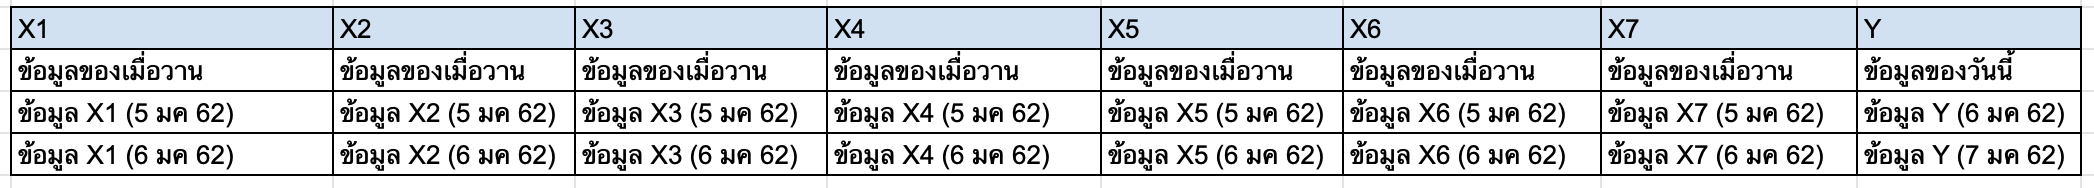

#นำเข้าข้อมูล

In [1422]:
import numpy as np
import pandas as pd
import os

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1423]:
#อุณหภูมิตุ้มเเห้ง
Dry_t_KKC = pd.read_excel("/content/drive/MyDrive/Mining/midterm/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.ขอนแก่น.xlsx",header=4)
Dry_t_NPM = pd.read_excel("/content/drive/MyDrive/Mining/midterm/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.นครพนม.xlsx",header=4)
Dry_t_SK = pd.read_excel("/content/drive/MyDrive/Mining/midterm/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.สกล.xlsx",header=4)
Dry_t_NK = pd.read_excel("/content/drive/MyDrive/Mining/midterm/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.หนองคาย.xlsx",header=4)
Dry_t_L = pd.read_excel("/content/drive/MyDrive/Mining/midterm/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.เลย.xlsx",header=4)
#อุณหภูมิต่ำสุด
lower_t_KKC = pd.read_excel("/content/drive/MyDrive/Mining/midterm/อุณหภูมิต่ำสุด(เซลเซียส)/จ.ขอนแก่น.xlsx",header=4)
lower_t_NPM = pd.read_excel("/content/drive/MyDrive/Mining/midterm/อุณหภูมิต่ำสุด(เซลเซียส)/จ.นครพนม.xlsx",header=4)
lower_t_SK = pd.read_excel("/content/drive/MyDrive/Mining/midterm/อุณหภูมิต่ำสุด(เซลเซียส)/จ.สกล.xlsx",header=4)
lower_t_NK = pd.read_excel("/content/drive/MyDrive/Mining/midterm/อุณหภูมิต่ำสุด(เซลเซียส)/จ.หนองคาย.xlsx",header=4)
lower_t_L = pd.read_excel("/content/drive/MyDrive/Mining/midterm/อุณหภูมิต่ำสุด(เซลเซียส)/จ.เลย.xlsx",header=4)
#อุณหภูมิจุดน้ำค้าง
Dew_t_KKC = pd.read_excel("/content/drive/MyDrive/Mining/midterm/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.ขอนแก่น.xlsx",header=4)
Dew_t_NPM = pd.read_excel("/content/drive/MyDrive/Mining/midterm/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.นครพนม.xlsx",header=4)
Dew_t_SK = pd.read_excel("/content/drive/MyDrive/Mining/midterm/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.สกล.xlsx",header=4)
Dew_t_NK = pd.read_excel("/content/drive/MyDrive/Mining/midterm/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.หนองคาย.xlsx",header=4)
Dew_t_L = pd.read_excel("/content/drive/MyDrive/Mining/midterm/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.เลย.xlsx",header=4)
#ความกดอากาศ
Airpressure_t_KKC = pd.read_excel("/content/drive/MyDrive/Mining/midterm/ความกด(เปอร์เซ็นต์)/จ.ขอนแก่น.xlsx",header=4)
Airpressure_t_NPM = pd.read_excel("/content/drive/MyDrive/Mining/midterm/ความกด(เปอร์เซ็นต์)/จ.นครพนม.xlsx",header=4)
Airpressure_t_SK = pd.read_excel("/content/drive/MyDrive/Mining/midterm/ความกด(เปอร์เซ็นต์)/จ.สกลนคร.xlsx",header=4)
Airpressure_t_NK = pd.read_excel("/content/drive/MyDrive/Mining/midterm/ความกด(เปอร์เซ็นต์)/จ.หนองคาย.xlsx",header=4)
Airpressure_t_L = pd.read_excel("/content/drive/MyDrive/Mining/midterm/ความกด(เปอร์เซ็นต์)/จ.เลย.xlsx",header=4)
#ความชื้นสัมพัทธ์
Rhumidity_t_KKC = pd.read_excel("/content/drive/MyDrive/Mining/midterm/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.ขอนแก่น.xlsx",header=4)
Rhumidity_t_NPM = pd.read_excel("/content/drive/MyDrive/Mining/midterm/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.นครพนม.xlsx",header=4)
Rhumidity_t_SK = pd.read_excel("/content/drive/MyDrive/Mining/midterm/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.สกลนคร.xlsx",header=4)
Rhumidity_t_NK = pd.read_excel("/content/drive/MyDrive/Mining/midterm/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.หนองคาย.xlsx",header=4)
Rhumidity_t_L = pd.read_excel("/content/drive/MyDrive/Mining/midterm/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.เลย.xlsx",header=4)
#ความเร็วลม
Wind_KKC = pd.read_excel("/content/drive/MyDrive/Mining/midterm/ความเร็วลม(นอต)/จ.ขอนแก่น.xlsx",header=4)
Wind_NPM = pd.read_excel("/content/drive/MyDrive/Mining/midterm/ความเร็วลม(นอต)/จ.นครพนม.xlsx",header=4)
Wind_SK = pd.read_excel("/content/drive/MyDrive/Mining/midterm/ความเร็วลม(นอต)/จ.สกลนคร.xlsx",header=4)
Wind_NK = pd.read_excel("/content/drive/MyDrive/Mining/midterm/ความเร็วลม(นอต)/จ.หนองคาย.xlsx",header=4)
Wind_L = pd.read_excel("/content/drive/MyDrive/Mining/midterm/ความเร็วลม(นอต)/จ.เลย.xlsx",header=4)
#จำนวนเมฆ
Clouds_KKC = pd.read_excel("/content/drive/MyDrive/Mining/midterm/จำนวนเมฆ(10ส่วน)/จ.ขอนแก่น.xlsx",header=4,dtype={'Unnamed: 34':int})
Clouds_NPM = pd.read_excel("/content/drive/MyDrive/Mining/midterm/จำนวนเมฆ(10ส่วน)/จ.นครพนม.xlsx",header=4,dtype={'Unnamed: 34':int})
Clouds_SK = pd.read_excel("/content/drive/MyDrive/Mining/midterm/จำนวนเมฆ(10ส่วน)/จ.สกลนคร.xlsx",header=4,dtype={'Unnamed: 34':int})
Clouds_NK = pd.read_excel("/content/drive/MyDrive/Mining/midterm/จำนวนเมฆ(10ส่วน)/จ.หนองคาย.xlsx",header=4,dtype={'Unnamed: 34':int})
Clouds_L = pd.read_excel("/content/drive/MyDrive/Mining/midterm/จำนวนเมฆ(10ส่วน)/จ.เลย.xlsx",header=4,dtype={'Unnamed: 34':int})
#ปริมาณน้ำฝน
Rain_KKC = pd.read_excel("/content/drive/MyDrive/Mining/midterm/ปริมาณฝน(มิลลิเมตร)/จ.ขอนแก่น.xlsx",header=4)
Rain_NPM = pd.read_excel("/content/drive/MyDrive/Mining/midterm/ปริมาณฝน(มิลลิเมตร)/จ.นครพนม.xlsx",header=4)
Rain_SK = pd.read_excel("/content/drive/MyDrive/Mining/midterm/ปริมาณฝน(มิลลิเมตร)/จ.สกล.xlsx",header=4)
Rain_NK = pd.read_excel("/content/drive/MyDrive/Mining/midterm/ปริมาณฝน(มิลลิเมตร)/จ.หนองคาย.xlsx",header=4)
Rain_L = pd.read_excel("/content/drive/MyDrive/Mining/midterm/ปริมาณฝน(มิลลิเมตร)/จ.เลย.xlsx",header=4)

#ขอนแก่น

##เปลี่ยนชื่อ column

In [1424]:
Dry_t_KKC1 = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี/เดือน/วัน','Unnamed: 34':'เฉลี่ย'}

In [1425]:
Dry_t_KKC = Dry_t_KKC.rename(columns=Dry_t_KKC1)

In [1426]:
Dry_t_KKC.head()

,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,27.6,25.6,25.6,25.8,24.3,24.0,25.1,...,26.7,27.6,27.4,27.2,27.3,26.9,26.3,25.8,26.2,26.2
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,26.3,26.3,26.3,26.6,26.8,27.5,27.9,...,26.5,23.9,24.4,25.5,26.1,26.2,26,26,-,25.8
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,25.4,23.9,21.3,22.3,23.0,25.6,25.4,...,23.6,21.1,18.3,18.3,20.4,23.5,23.7,24.2,24.1,22.4
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,23.8,24.5,25.0,24.8,22.8,23.4,23.1,...,25.3,24.4,24.1,22.1,24.6,26.3,25.6,25.3,23,24.4
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,23.9,25.4,25.3,24.8,27.2,28.2,28.3,...,28.3,29.1,29.6,29.2,28.2,27.5,28.5,-,-,26.5


In [1427]:
lower_t_KKC1 = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี/เดือน/วัน','Unnamed: 34':'เฉลี่ย'}

In [1428]:
lower_t_KKC = lower_t_KKC.rename(columns=lower_t_KKC1)

In [1429]:
lower_t_KKC.head()

,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,24.8,23.0,22.1,22.8,23.1,21.7,22.0,...,21.3,22,22.7,21.6,21.7,22.4,21.7,20.2,21.1,22.4
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,20.7,20.4,20.5,20.9,20.6,22.2,23.8,...,21.5,18.5,18.4,18.9,20.2,20.1,20.2,19.8,-,20.3
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,19.3,18.9,15.4,15.6,16.3,20.2,20.8,...,17.1,16.5,12.1,11.6,13.2,16.5,16.7,18.4,17,16.4
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,17.7,19.6,20.4,20.7,16.8,16.9,16.8,...,22.6,18.6,19.4,16.2,17.5,21.6,20.8,21.6,20.1,19.4
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,19.4,20.5,20.9,20.9,21.5,21.1,20.7,...,19.6,21.3,21.1,21.3,23.4,22,22.2,-,-,20.1


In [1430]:
Dew_t_KKC1 = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี/เดือน/วัน','Unnamed: 34':'เฉลี่ย'}

In [1431]:
Dew_t_KKC = Dew_t_KKC.rename(columns=Dew_t_KKC1)

In [1432]:
Dew_t_KKC.head()

,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,24.2,24.0,22.9,21.9,21.7,21.3,21.9,...,21.0,21.8,21.8,20.7,20.8,21.9,20.3,19.7,19.7,21.903226
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,20.2,18.5,19.4,19.0,19.2,20.6,21.3,...,18.9,16.7,16.7,18.3,19.2,18.9,19,18.3,-,18.910000
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,17.7,15.3,12.7,14.0,14.6,16.6,19.1,...,15.8,12.9,9.8,9.7,12.4,16.1,16.3,16.1,16.3,14.525806
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,16.5,17.4,18.7,17.0,15.3,16.7,15.6,...,21.5,19.2,19.2,16.3,19.5,19.7,19.4,18.7,16.7,18.058065
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,18.0,19.6,19.5,19.2,20.7,20.8,19.1,...,18.4,17.0,16.3,18.8,22.3,22.1,21.3,-,-,18.772414


In [1433]:
Airpressure_t_KKC1 = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี/เดือน/วัน','Unnamed: 34':'เฉลี่ย'}

In [1434]:
Airpressure_t_KKC = Airpressure_t_KKC.rename(columns=Airpressure_t_KKC1)

In [1435]:
Airpressure_t_KKC.head()

,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1005.47,1006.65,1007.49,1008.28,1009.88,1011.36,1011.17,...,1010.76,1010.23,1011.34,1011.84,1011.89,1012.29,1011.67,1011.3,1011.52,1010.350645
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1011.79,1010.83,1010.74,1010.71,1010.09,1009.24,1008.03,...,1014.07,1015.40,1013.95,1012.35,1011.31,1009.59,1010.13,1010.47,-,1011.717000
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1011.43,1012.57,1012.28,1012.97,1013.09,1012.03,1012.05,...,1012.88,1015.78,1018.56,1018.65,1016.88,1016.05,1014.98,1015.53,1016.4,1016.470000
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1015.67,1014.11,1012.91,1014.06,1015.51,1015.88,1017.72,...,1010.91,1011.27,1011.65,1012.56,1010.76,1010.26,1010.69,1012.34,1014.52,1012.484516
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1013.26,1012.92,1013.61,1013.18,1011.26,1008.80,1008.16,...,1005.75,1005.46,1004.80,1005.08,1006.57,1005.96,1006.53,1010.47,-,1009.749667


In [1436]:
Rhumidity_t_KKC1 = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี/เดือน/วัน','Unnamed: 34':'เฉลี่ย'}

In [1437]:
Rhumidity_t_KKC = Rhumidity_t_KKC.rename(columns=Rhumidity_t_KKC1)

In [1438]:
Rhumidity_t_KKC.head()

,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,83,92,86,80,86,86,83,...,73,72,73,69,69,75,71,71,68,79
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,71,65,68,65,65,68,69,...,65,66,65,67,68,67,67,65,-,68
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,66,61,61,62,61,60,69,...,63,62,60,60,62,65,66,63,64,63
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,65,66,69,63,64,68,65,...,80,74,75,71,75,69,70,67,68,69
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,71,72,71,72,70,68,61,...,58,53,48,57,71,73,68,-,-,65


In [1439]:
Wind_KKC1 = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี/เดือน/วัน','Unnamed: 34':'เฉลี่ย'}

In [1440]:
Wind_KKC = Wind_KKC.rename(columns=Wind_KKC1)

In [1441]:
Wind_KKC.head()

,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,3,2,3,2,2,3,4,...,2,3,5,5,5,4,6,4,5,3.354839
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,4,5,3,3,5,2,3,...,7,6,5,5,3,1,3,3,-,3.466667
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,3,4,4,4,4,4,4,...,5,6,7,6,5,4,4,6,5,4.806452
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,4,2,1,4,4,2,4,...,3,3,4,2,2,1,3,4,4,3.129032
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,2,2,3,2,3,1,2,...,1,2,3,2,4,3,3,3,-,2.566667


In [1442]:
Clouds_KKC1 = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี/เดือน/วัน','Unnamed: 34':'เฉลี่ย'}

In [1443]:
Clouds_KKC = Clouds_KKC.rename(columns=Clouds_KKC1)

In [1444]:
Clouds_KKC.head()

,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,9,10,10,8,10,10,10,...,2,3,5,3,3,5,4,2,2,6
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,2,2,2,2,3,6,9,...,6,6,3,2,2,1,3,2,-,3
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,2,3,4,4,5,8,7,...,5,5,3,3,1,2,1,1,1,3
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,1,4,7,6,3,1,3,...,6,4,4,3,2,5,6,10,10,5
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,6,6,8,8,3,3,1,...,1,2,0,1,4,5,1,2,-,2


In [1445]:
Rain_KKC1 = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี/เดือน/วัน','Unnamed: 34':'เฉลี่ย'}

In [1446]:
Rain_KKC = Rain_KKC.rename(columns=Rain_KKC1)

In [1447]:
Rain_KKC.head()

,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,1.4,17.7,3,0,2.2,0.5,1.3,...,0,0,T,0,0.5,1.1,0,0,0,176.8
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-,11.8
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,T,0,38.7
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,0,0,T,0,0,0,0,...,0,0,0,0,0,0,0,-,-,T


##ตรวจสอบmissing

In [1448]:
Dry_t_KKC=Dry_t_KKC.replace('-',np.NaN)
Dry_t_KKC.isnull().any()


ที่             False
สถานี           False
ปี/เดือน/วัน    False
1               False
2               False
3               False
4               False
5               False
6               False
7               False
8               False
9               False
10              False
11              False
12              False
13              False
14              False
15              False
16              False
17              False
18              False
19              False
20              False
21              False
22              False
23              False
24              False
25              False
26              False
27              False
28              False
29               True
30               True
31               True
เฉลี่ย          False
dtype: bool

In [1449]:
lower_t_KKC=lower_t_KKC.replace('-',np.NaN)
lower_t_KKC.isnull().any()

ที่             False
สถานี           False
ปี/เดือน/วัน    False
1               False
2               False
3               False
4               False
5               False
6               False
7               False
8               False
9               False
10              False
11              False
12              False
13              False
14              False
15              False
16              False
17              False
18               True
19               True
20               True
21               True
22               True
23               True
24               True
25              False
26              False
27               True
28               True
29               True
30               True
31               True
เฉลี่ย          False
dtype: bool

In [1450]:
Dew_t_KKC=Dew_t_KKC.replace('-',np.NaN)
Dew_t_KKC.isnull().any()

ที่             False
สถานี           False
ปี/เดือน/วัน    False
1               False
2               False
3               False
4               False
5               False
6               False
7               False
8               False
9               False
10              False
11              False
12              False
13              False
14              False
15              False
16              False
17              False
18              False
19              False
20              False
21              False
22              False
23              False
24              False
25              False
26              False
27              False
28              False
29               True
30               True
31               True
เฉลี่ย          False
dtype: bool

In [1451]:
Airpressure_t_KKC=Airpressure_t_KKC.replace('-',np.NaN)
Airpressure_t_KKC.isnull().any()

ที่             False
สถานี           False
ปี/เดือน/วัน    False
1               False
2               False
3               False
4               False
5               False
6               False
7               False
8               False
9               False
10              False
11              False
12              False
13              False
14              False
15              False
16              False
17              False
18              False
19              False
20              False
21              False
22              False
23              False
24              False
25              False
26              False
27              False
28              False
29               True
30               True
31               True
เฉลี่ย          False
dtype: bool

In [1452]:
Rhumidity_t_KKC=Rhumidity_t_KKC.replace('-',np.NaN)
Rhumidity_t_KKC.isnull().any()

ที่             False
สถานี           False
ปี/เดือน/วัน    False
1               False
2               False
3               False
4               False
5               False
6               False
7               False
8               False
9               False
10              False
11              False
12              False
13              False
14              False
15              False
16              False
17              False
18              False
19              False
20              False
21              False
22              False
23              False
24              False
25              False
26              False
27              False
28              False
29               True
30               True
31               True
เฉลี่ย          False
dtype: bool

In [1453]:
Wind_KKC=Wind_KKC.replace('-',np.NaN)
Wind_KKC.isnull().any()

ที่             False
สถานี           False
ปี/เดือน/วัน    False
1               False
2               False
3                True
4               False
5               False
6               False
7               False
8               False
9               False
10              False
11              False
12              False
13              False
14              False
15              False
16              False
17              False
18              False
19              False
20              False
21               True
22              False
23              False
24              False
25              False
26              False
27              False
28              False
29               True
30               True
31               True
เฉลี่ย          False
dtype: bool

In [1454]:
Clouds_KKC=Clouds_KKC.replace('-',np.NaN)
Clouds_KKC.isnull().any()

ที่             False
สถานี           False
ปี/เดือน/วัน    False
1               False
2               False
3                True
4               False
5               False
6               False
7               False
8               False
9               False
10              False
11              False
12              False
13              False
14              False
15              False
16              False
17              False
18              False
19              False
20              False
21               True
22              False
23              False
24              False
25              False
26              False
27              False
28              False
29               True
30               True
31               True
เฉลี่ย          False
dtype: bool

In [1455]:
Rain_KKC=Dry_t_KKC.replace('-',np.NaN)
Rain_KKC.isnull().any()

ที่             False
สถานี           False
ปี/เดือน/วัน    False
1               False
2               False
3               False
4               False
5               False
6               False
7               False
8               False
9               False
10              False
11              False
12              False
13              False
14              False
15              False
16              False
17              False
18              False
19              False
20              False
21              False
22              False
23              False
24              False
25              False
26              False
27              False
28              False
29               True
30               True
31               True
เฉลี่ย          False
dtype: bool

##แก้ Missing

In [1456]:
#แทนค่า
for i in range(len(Dry_t_KKC['ที่'])):Dry_t_KKC.iloc[i,:]=Dry_t_KKC.iloc[i,:].fillna(Dry_t_KKC.iloc[i]['เฉลี่ย'])
for i in range(len(lower_t_KKC['ที่'])):lower_t_KKC.iloc[i,:]=lower_t_KKC.iloc[i,:].fillna(lower_t_KKC.iloc[i]['เฉลี่ย'])
for i in range(len(Dew_t_KKC['ที่'])):Dew_t_KKC.iloc[i,:]=Dew_t_KKC.iloc[i,:].fillna(Dew_t_KKC.iloc[i]['เฉลี่ย'])
for i in range(len(Airpressure_t_KKC['ที่'])):Airpressure_t_KKC.iloc[i,:]=Airpressure_t_KKC.iloc[i,:].fillna(Airpressure_t_KKC.iloc[i]['เฉลี่ย'])
for i in range(len(Rhumidity_t_KKC['ที่'])):Rhumidity_t_KKC.iloc[i,:]=Rhumidity_t_KKC.iloc[i,:].fillna(Rhumidity_t_KKC.iloc[i]['เฉลี่ย'])
for i in range(len(Wind_KKC['ที่'])):Wind_KKC.iloc[i,:]=Wind_KKC.iloc[i,:].fillna(Wind_KKC.iloc[i]['เฉลี่ย'])
for i in range(len(Clouds_KKC['ที่'])):Clouds_KKC.iloc[i,:]=Clouds_KKC.iloc[i,:].fillna(Clouds_KKC.iloc[i]['เฉลี่ย'])
for i in range(len(Rain_KKC['ที่'])):Rain_KKC.iloc[i,:]=Rain_KKC.iloc[i,:].fillna(Rain_KKC.iloc[i]['เฉลี่ย'])


In [1457]:
Rain_KKC.drop(columns='เฉลี่ย', inplace=True)
# หาค่าเฉลี่ยของ ปริมาณฝน ค่าเฉลี่ยใหม่

In [1458]:
Rain_KKC['เฉลี่ย']=Rain_KKC.mean(axis=1)

<ipython-input-1458-ae3555eee944>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  Rain_KKC['เฉลี่ย']=Rain_KKC.mean(axis=1)
<ipython-input-1458-ae3555eee944>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Rain_KKC['เฉลี่ย']=Rain_KKC.mean(axis=1)


In [1459]:
for i in range(len(Rain_KKC['ที่'])):Rain_KKC.iloc[i,:]=Rain_KKC.iloc[i,:].fillna(Rain_KKC.iloc[i]['เฉลี่ย'])

In [1460]:
Rain_KKC=Rain_KKC.replace('-',np.NaN)
Rain_KKC = Rain_KKC.replace('T',0.1)
print(Rain_KKC.isnull().any()) # เช็คค่าว่าง Null # true คือ มีค่าว่าง
Rain_KKC.head()

ที่             False
สถานี           False
ปี/เดือน/วัน    False
1               False
2               False
3               False
4               False
5               False
6               False
7               False
8               False
9               False
10              False
11              False
12              False
13              False
14              False
15              False
16              False
17              False
18              False
19              False
20              False
21              False
22              False
23              False
24              False
25              False
26              False
27              False
28              False
29              False
30              False
31              False
เฉลี่ย          False
dtype: bool


,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,27.6,25.6,25.6,25.8,24.3,24.0,25.1,...,26.7,27.6,27.4,27.2,27.3,26.9,26.3,25.8,26.2,26.206452
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,26.3,26.3,26.3,26.6,26.8,27.5,27.9,...,26.5,23.9,24.4,25.5,26.1,26.2,26.0,26.0,25.8,25.854839
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,25.4,23.9,21.3,22.3,23.0,25.6,25.4,...,23.6,21.1,18.3,18.3,20.4,23.5,23.7,24.2,24.1,22.451613
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,23.8,24.5,25.0,24.8,22.8,23.4,23.1,...,25.3,24.4,24.1,22.1,24.6,26.3,25.6,25.3,23.0,24.441935
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,23.9,25.4,25.3,24.8,27.2,28.2,28.3,...,28.3,29.1,29.6,29.2,28.2,27.5,28.5,26.5,26.5,26.470968


In [1461]:
#เช็ค
Rain_KKC=Rain_KKC.replace('-',np.NaN)
Rain_KKC.isnull().any()


ที่             False
สถานี           False
ปี/เดือน/วัน    False
1               False
2               False
3               False
4               False
5               False
6               False
7               False
8               False
9               False
10              False
11              False
12              False
13              False
14              False
15              False
16              False
17              False
18              False
19              False
20              False
21              False
22              False
23              False
24              False
25              False
26              False
27              False
28              False
29              False
30              False
31              False
เฉลี่ย          False
dtype: bool

#นครพนม

##เปลี่ยนชื่อ column

In [1462]:
Dry_t_NPM1 = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี/เดือน/วัน','Unnamed: 34':'เฉลี่ย'}

In [1463]:
Dry_t_NPM = Dry_t_NPM.rename(columns=Dry_t_NPM1)

In [1464]:
Dry_t_NPM.head()

,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,357201-นครพนม จ.นครพนม,2011-10-01,25.9,26.1,25.3,24.7,23.1,23.2,25.6,...,27.3,27.9,27.0,27.2,27.1,27.6,25.5,25.8,25.9,26.0
1,2,357201-นครพนม จ.นครพนม,2011-11-01,25.8,25.8,25.5,26.8,26.5,27.8,27.3,...,25.5,23.7,23.9,24.8,25.2,26.2,26.2,26.2,-,25.5
2,3,357201-นครพนม จ.นครพนม,2011-12-01,25.4,22.1,20.4,21.3,22.6,23.1,25.2,...,21.6,20.0,17.4,18.0,20.0,22.0,23.9,23.2,21.9,21.3
3,1,357201-นครพนม จ.นครพนม,2012-01-01,21.7,22.8,24.7,23.4,20.3,21.2,21.1,...,20.9,21.4,21.3,21.4,22.8,25.2,24.5,24.1,22.6,22.6
4,2,357201-นครพนม จ.นครพนม,2012-02-01,23.0,24.3,23.4,24.0,25.6,27.3,27.8,...,27.4,28.8,28.5,27.4,23.8,22.4,26.7,-,-,25.1


In [1465]:
lower_t_NPM1 = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี/เดือน/วัน','Unnamed: 34':'เฉลี่ย'}

In [1466]:
lower_t_NPM = lower_t_NPM.rename(columns=lower_t_NPM1)

In [1467]:
lower_t_NPM.head()

,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,357201-นครพนม จ.นครพนม,2011-10-01,25.0,23.4,22.2,20.6,21.1,21.0,22.5,...,22,22.5,22.2,22.2,22.3,23.5,21.5,20.5,21,22.4
1,2,357201-นครพนม จ.นครพนม,2011-11-01,20.4,20.5,19.7,20.6,21.3,23.7,24.4,...,21.7,19.2,18.8,18.8,19.6,20.4,19.8,20.9,-,20.4
2,3,357201-นครพนม จ.นครพนม,2011-12-01,19.4,19.8,14.1,14.5,15,18.1,20.7,...,15.8,19.0,13.2,11.6,12.0,14.6,18.6,17.7,15.8,16.1
3,1,357201-นครพนม จ.นครพนม,2012-01-01,15.1,15.5,19.9,21.7,14.9,13.8,15.9,...,20.4,14.6,18.9,14.1,16.3,19.1,18.7,21.3,18.5,17.9
4,2,357201-นครพนม จ.นครพนม,2012-02-01,17.3,18.2,21.5,19.1,20.1,21.3,21.4,...,19.5,21.6,21.3,22.5,21.8,18.6,19,-,-,19.2


In [1468]:
Dew_t_NPM1 = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี/เดือน/วัน','Unnamed: 34':'เฉลี่ย'}

In [1469]:
Dew_t_NPM = Dew_t_NPM.rename(columns=Dew_t_NPM1)

In [1470]:
Dry_t_NPM.head()

,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,357201-นครพนม จ.นครพนม,2011-10-01,25.9,26.1,25.3,24.7,23.1,23.2,25.6,...,27.3,27.9,27.0,27.2,27.1,27.6,25.5,25.8,25.9,26.0
1,2,357201-นครพนม จ.นครพนม,2011-11-01,25.8,25.8,25.5,26.8,26.5,27.8,27.3,...,25.5,23.7,23.9,24.8,25.2,26.2,26.2,26.2,-,25.5
2,3,357201-นครพนม จ.นครพนม,2011-12-01,25.4,22.1,20.4,21.3,22.6,23.1,25.2,...,21.6,20.0,17.4,18.0,20.0,22.0,23.9,23.2,21.9,21.3
3,1,357201-นครพนม จ.นครพนม,2012-01-01,21.7,22.8,24.7,23.4,20.3,21.2,21.1,...,20.9,21.4,21.3,21.4,22.8,25.2,24.5,24.1,22.6,22.6
4,2,357201-นครพนม จ.นครพนม,2012-02-01,23.0,24.3,23.4,24.0,25.6,27.3,27.8,...,27.4,28.8,28.5,27.4,23.8,22.4,26.7,-,-,25.1


In [1471]:
Airpressure_t_NPM1 = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี/เดือน/วัน','Unnamed: 34':'เฉลี่ย'}

In [1472]:
Airpressure_t_NPM = Airpressure_t_NPM.rename(columns=Airpressure_t_NPM1)

In [1473]:
Airpressure_t_NPM.head()

,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1006.30,1007.38,1008.07,1008.44,1010.51,1011.65,1011.24,...,1011.09,1010.64,1012.01,1012.47,1012.46,1012.85,1012.43,1011.69,1012.28,1010.754839
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1012.28,1011.23,1011.08,1010.96,1010.57,1009.20,1007.99,...,1015.49,1016.09,1014.62,1012.80,1011.83,1010.00,1010.6,1011.13,-,1012.184667
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1012.15,1013.75,1013.24,1013.94,1013.35,1012.62,1012.48,...,1014.23,1017.58,1019.77,1019.71,1017.34,1017.01,1015.64,1016.89,1017.73,1016.470000
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1016.56,1014.88,1013.41,1015.85,1016.94,1017.13,1019.21,...,1013.13,1012.45,1013.59,1013.15,1011.56,1010.71,1011.95,1013.77,1015.5,1013.510000
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1013.98,1013.75,1014.96,1013.52,1011.85,1008.82,1008.15,...,1005.76,1005.13,1004.94,1006.42,1008.93,1007.88,1007.29,1011.13,-,1010.608000


In [1474]:
Rhumidity_t_NPM1 = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี/เดือน/วัน','Unnamed: 34':'เฉลี่ย'}

In [1475]:
Rhumidity_t_NPM = Rhumidity_t_NPM.rename(columns=Rhumidity_t_NPM1)

In [1476]:
Rhumidity_t_NPM.head()

,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,357201-นครพนม จ.นครพนม,2011-10-01,95,84,74,72,87,88,81,...,66,67,70,69,71,66,72,70,69,77
1,2,357201-นครพนม จ.นครพนม,2011-11-01,69,67,70,68,71,68,73,...,66,66,70,78,74,69,66,65,-,69
2,3,357201-นครพนม จ.นครพนม,2011-12-01,64,56,62,67,69,77,73,...,66,54,60,61,70,71,63,66,70,65
3,1,357201-นครพนม จ.นครพนม,2012-01-01,71,70,64,59,68,69,66,...,73,74,62,67,74,71,61,59,62,71
4,2,357201-นครพนม จ.นครพนม,2012-02-01,68,69,66,71,71,71,64,...,63,61,64,64,68,76,69,-,-,65


In [1477]:
Wind_NPM1 = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี/เดือน/วัน','Unnamed: 34':'เฉลี่ย'}

In [1478]:
Wind_NPM = Wind_NPM.rename(columns=Wind_NPM1)

In [1479]:
Wind_NPM.head()

,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,1,1,2,2,1,0,2,...,1,2,2,1,2,2,1,1,1,1.322581
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,1,1,1,1,1,1,1,...,3,3,2,2,1,1,1,1,-,1.200000
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,1,2,2,1,1,1,1,...,1,3,3,1,2,1,1,2,2,1.741935
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,2,2,3,5,2,3,3,...,4,1,5,1,1,1,4,5,4,2.448276
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,1,3,4,0,0,1,1,...,1,2,2,3,3,3,1,2,-,2.200000


In [1480]:
Clouds_NPM1 = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี/เดือน/วัน','Unnamed: 34':'เฉลี่ย'}

In [1481]:
Clouds_NPM = Clouds_NPM.rename(columns=Clouds_NPM1)


In [1482]:
Clouds_NPM.head()

,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,10,7,8,8,10,10,9,...,2,2,2,2,3,3,4,2,4,5
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,2,2,2,3,5,7,9,...,4,4,4,2,2,2,1,1,-,3
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,2,2,2,4,4,7,8,...,4,2,2,2,2,1,2,1,1,3
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,1,1,4,6,4,2,5,...,5,3,2,2,2,3,3,6,5,4
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,5,5,8,7,3,3,2,...,2,2,2,3,7,6,2,1,-,2


In [1483]:
Rain_NPM1 = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี/เดือน/วัน','Unnamed: 34':'เฉลี่ย'}

In [1484]:
Rain_NPM = Rain_NPM.rename(columns=Rain_NPM1)

In [1485]:
Rain_NPM.head()

,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,357201-นครพนม จ.นครพนม,2011-10-01,17,0.3,0,0.3,1.9,T,0,...,0,0,0,0,0,0,0,0,0,75.4
1,2,357201-นครพนม จ.นครพนม,2011-11-01,0,0,0,0,T,T,0,...,0,0,0,0,0.5,0,0,0,-,0.5
2,3,357201-นครพนม จ.นครพนม,2011-12-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-
3,1,357201-นครพนม จ.นครพนม,2012-01-01,0,0,0,0,0,0,0,...,2.3,0,0,0,0,0,0,0,0,14.9
4,2,357201-นครพนม จ.นครพนม,2012-02-01,0,0,T,0,0,0,0,...,0,0,0,0,1.2,0,0,-,-,1.2


##ตรวจสอบmissing

In [1486]:
Dry_t_NPM=Dry_t_NPM.replace('-',np.NaN)
Dry_t_NPM.isnull().any()

ที่             False
สถานี           False
ปี/เดือน/วัน    False
1               False
2               False
3               False
4               False
5               False
6               False
7               False
8               False
9               False
10              False
11              False
12              False
13              False
14              False
15              False
16              False
17              False
18              False
19              False
20              False
21              False
22              False
23              False
24              False
25              False
26              False
27              False
28              False
29               True
30               True
31               True
เฉลี่ย          False
dtype: bool

In [1487]:
lower_t_NPM=lower_t_NPM.replace('-',np.NaN)
lower_t_NPM.isnull().any()

ที่             False
สถานี           False
ปี/เดือน/วัน    False
1               False
2               False
3               False
4               False
5                True
6               False
7               False
8               False
9               False
10              False
11               True
12              False
13              False
14              False
15              False
16               True
17               True
18               True
19               True
20              False
21               True
22               True
23               True
24              False
25               True
26              False
27              False
28               True
29               True
30               True
31               True
เฉลี่ย          False
dtype: bool

In [1488]:
Dew_t_NPM=Dew_t_NPM.replace('-',np.NaN)
Dew_t_NPM.isnull().any()

ที่             False
สถานี           False
ปี/เดือน/วัน    False
1               False
2               False
3               False
4               False
5               False
6               False
7               False
8               False
9               False
10              False
11              False
12              False
13              False
14              False
15              False
16              False
17              False
18              False
19              False
20              False
21              False
22              False
23              False
24              False
25              False
26              False
27              False
28              False
29               True
30               True
31               True
เฉลี่ย          False
dtype: bool

In [1489]:
Airpressure_t_NPM=Airpressure_t_NPM.replace('-',np.NaN)
Airpressure_t_NPM.isnull().any()

ที่             False
สถานี           False
ปี/เดือน/วัน    False
1               False
2               False
3               False
4               False
5               False
6               False
7               False
8               False
9               False
10              False
11              False
12              False
13              False
14              False
15              False
16              False
17              False
18              False
19              False
20              False
21              False
22              False
23              False
24              False
25              False
26              False
27              False
28              False
29               True
30               True
31               True
เฉลี่ย          False
dtype: bool

In [1490]:
Rhumidity_t_NPM=Rhumidity_t_NPM.replace('-',np.NaN)
Rhumidity_t_NPM.isnull().any()

ที่             False
สถานี           False
ปี/เดือน/วัน    False
1               False
2               False
3               False
4               False
5               False
6               False
7               False
8               False
9               False
10              False
11              False
12              False
13              False
14              False
15              False
16              False
17              False
18              False
19              False
20              False
21              False
22              False
23              False
24              False
25              False
26              False
27              False
28              False
29               True
30               True
31               True
เฉลี่ย          False
dtype: bool

In [1491]:
Wind_NPM=Wind_NPM.replace('-',np.NaN)
Wind_NPM.isnull().any()

ที่             False
สถานี           False
ปี/เดือน/วัน    False
1               False
2               False
3               False
4                True
5                True
6               False
7                True
8                True
9               False
10               True
11               True
12               True
13              False
14              False
15               True
16               True
17              False
18               True
19              False
20               True
21               True
22               True
23              False
24               True
25               True
26              False
27              False
28               True
29               True
30               True
31               True
เฉลี่ย          False
dtype: bool

In [1492]:
Clouds_NPM=Clouds_NPM.replace('-',np.NaN)
Clouds_NPM.isnull().any()

ที่             False
สถานี           False
ปี/เดือน/วัน    False
1                True
2                True
3                True
4                True
5                True
6                True
7                True
8                True
9                True
10               True
11              False
12              False
13               True
14               True
15               True
16              False
17              False
18               True
19               True
20               True
21               True
22               True
23               True
24               True
25               True
26              False
27               True
28              False
29               True
30               True
31               True
เฉลี่ย          False
dtype: bool

In [1493]:
Rain_NPM=Rain_NPM.replace('-',np.NaN)
Rain_NPM.isnull().any()

ที่             False
สถานี           False
ปี/เดือน/วัน    False
1                True
2                True
3                True
4                True
5                True
6                True
7                True
8                True
9                True
10               True
11               True
12               True
13               True
14               True
15               True
16               True
17               True
18               True
19               True
20               True
21               True
22               True
23               True
24               True
25               True
26               True
27               True
28               True
29               True
30               True
31               True
เฉลี่ย           True
dtype: bool

##แก้ Missing

In [1494]:
#แทนค่า
for i in range(len(Dry_t_NPM['ที่'])):Dry_t_NPM.iloc[i,:]=Dry_t_NPM.iloc[i,:].fillna(Dry_t_NPM.iloc[i]['เฉลี่ย'])
for i in range(len(lower_t_NPM['ที่'])):lower_t_NPM.iloc[i,:]=lower_t_NPM.iloc[i,:].fillna(lower_t_NPM.iloc[i]['เฉลี่ย'])
for i in range(len(Dew_t_NPM['ที่'])):Dew_t_NPM.iloc[i,:]=Dew_t_NPM.iloc[i,:].fillna(Dew_t_NPM.iloc[i]['เฉลี่ย'])
for i in range(len(Airpressure_t_NPM['ที่'])):Airpressure_t_NPM.iloc[i,:]=Airpressure_t_NPM.iloc[i,:].fillna(Airpressure_t_NPM.iloc[i]['เฉลี่ย'])
for i in range(len(Rhumidity_t_NPM['ที่'])):Rhumidity_t_NPM.iloc[i,:]=Rhumidity_t_NPM.iloc[i,:].fillna(Rhumidity_t_NPM.iloc[i]['เฉลี่ย'])
for i in range(len(Wind_NPM['ที่'])):Wind_NPM.iloc[i,:]=Wind_NPM.iloc[i,:].fillna(Wind_NPM.iloc[i]['เฉลี่ย'])
for i in range(len(Clouds_NPM['ที่'])):Clouds_NPM.iloc[i,:]=Clouds_NPM.iloc[i,:].fillna(Clouds_NPM.iloc[i]['เฉลี่ย'])
for i in range(len(Rain_NPM['ที่'])):Rain_NPM.iloc[i,:]=Rain_NPM.iloc[i,:].fillna(Rain_NPM.iloc[i]['เฉลี่ย'])


In [1495]:
Rain_NPM.drop(columns='เฉลี่ย', inplace=True)
# หาค่าเฉลี่ยของ ปริมาณฝน ค่าเฉลี่ยใหม่

In [1496]:
Rain_NPM['เฉลี่ย']=Rain_NPM.mean(axis=1)

<ipython-input-1496-7df1a52cf6b5>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  Rain_NPM['เฉลี่ย']=Rain_NPM.mean(axis=1)
<ipython-input-1496-7df1a52cf6b5>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Rain_NPM['เฉลี่ย']=Rain_NPM.mean(axis=1)


In [1497]:
for i in range(len(Rain_NPM['ที่'])):Rain_NPM.iloc[i,:]=Rain_NPM.iloc[i,:].fillna(Rain_NPM.iloc[i]['เฉลี่ย'])

In [1498]:
Rain_NPM=Rain_NPM.replace('-',np.NaN)
Rain_NPM = Rain_NPM.replace('T',0.1)
print(Rain_NPM.isnull().any()) # เช็คค่าว่าง Null # true คือ มีค่าว่าง
Rain_NPM.head()

ที่             False
สถานี           False
ปี/เดือน/วัน    False
1               False
2               False
3               False
4               False
5               False
6               False
7               False
8               False
9               False
10              False
11              False
12              False
13              False
14              False
15              False
16              False
17              False
18              False
19              False
20              False
21              False
22              False
23              False
24              False
25              False
26              False
27              False
28              False
29              False
30              False
31              False
เฉลี่ย          False
dtype: bool


,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,357201-นครพนม จ.นครพนม,2011-10-01,17.0,0.3,0.0,0.3,1.9,0.1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.15
1,2,357201-นครพนม จ.นครพนม,2011-11-01,0.0,0.0,0.0,0.0,0.1,0.1,0.0,...,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.5,0.25
2,3,357201-นครพนม จ.นครพนม,2011-12-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
3,1,357201-นครพนม จ.นครพนม,2012-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
4,2,357201-นครพนม จ.นครพนม,2012-02-01,0.0,0.0,0.1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.2,0.0,0.0,1.2,1.2,0.60


In [1499]:
#เช็ค
Rain_NPM=Rain_NPM.replace('-',np.NaN)
Rain_NPM.isnull().any()


ที่             False
สถานี           False
ปี/เดือน/วัน    False
1               False
2               False
3               False
4               False
5               False
6               False
7               False
8               False
9               False
10              False
11              False
12              False
13              False
14              False
15              False
16              False
17              False
18              False
19              False
20              False
21              False
22              False
23              False
24              False
25              False
26              False
27              False
28              False
29              False
30              False
31              False
เฉลี่ย          False
dtype: bool

# สกลนคร

In [1500]:
Dry_t_NPM=Dry_t_NPM.replace('-',np.NaN)
print(Dry_t_NPM.isnull().any())
Dry_t_NPM.head()

ที่             False
สถานี           False
ปี/เดือน/วัน    False
1               False
2               False
3               False
4               False
5               False
6               False
7               False
8               False
9               False
10              False
11              False
12              False
13              False
14              False
15              False
16              False
17              False
18              False
19              False
20              False
21              False
22              False
23              False
24              False
25              False
26              False
27              False
28              False
29              False
30              False
31              False
เฉลี่ย          False
dtype: bool


,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,357201-นครพนม จ.นครพนม,2011-10-01,25.9,26.1,25.3,24.7,23.1,23.2,25.6,...,27.3,27.9,27.0,27.2,27.1,27.6,25.5,25.8,25.9,26.0
1,2,357201-นครพนม จ.นครพนม,2011-11-01,25.8,25.8,25.5,26.8,26.5,27.8,27.3,...,25.5,23.7,23.9,24.8,25.2,26.2,26.2,26.2,25.5,25.5
2,3,357201-นครพนม จ.นครพนม,2011-12-01,25.4,22.1,20.4,21.3,22.6,23.1,25.2,...,21.6,20.0,17.4,18.0,20.0,22.0,23.9,23.2,21.9,21.3
3,1,357201-นครพนม จ.นครพนม,2012-01-01,21.7,22.8,24.7,23.4,20.3,21.2,21.1,...,20.9,21.4,21.3,21.4,22.8,25.2,24.5,24.1,22.6,22.6
4,2,357201-นครพนม จ.นครพนม,2012-02-01,23.0,24.3,23.4,24.0,25.6,27.3,27.8,...,27.4,28.8,28.5,27.4,23.8,22.4,26.7,25.1,25.1,25.1


##เปลี่ยนชื่อcolumn

In [1501]:
Dry_t_SK1 = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี/เดือน/วัน','Unnamed: 34':'เฉลี่ย'}

In [1502]:
Dry_t_SK = Dry_t_SK.rename(columns=Dry_t_SK1)

In [1503]:
Dry_t_SK.head()

,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,356201-สกลนคร จ.สกลนคร,2011-10-01,26.9,25.9,25.7,25.2,23.6,23.5,25.6,...,26.2,27.0,26.6,26.9,27.1,27.5,25.4,25.2,25.5,26.0
1,2,356201-สกลนคร จ.สกลนคร,2011-11-01,25.7,25.5,25.5,26.1,26.7,27.8,26.7,...,25.8,23.8,23.7,24.8,25.6,25.7,25.3,25.4,-,25.3
2,3,356201-สกลนคร จ.สกลนคร,2011-12-01,25.4,22.4,19.9,21.0,22.0,23.5,25.2,...,21.4,19.4,17.1,18.1,20.0,22.0,22.7,22.9,22.3,21.1
3,1,356201-สกลนคร จ.สกลนคร,2012-01-01,22.2,22.7,24.3,23.3,20.5,21.4,20.9,...,22.0,22.1,21.0,20.2,23.2,25.2,24.4,23.4,22.1,22.6
4,2,356201-สกลนคร จ.สกลนคร,2012-02-01,23.0,24.1,23.1,23.8,25.9,27.8,28.1,...,27.3,29.6,28.6,27.4,24.4,23.8,26.3,-,-,25.0


In [1504]:
lower_t_SK1 = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี/เดือน/วัน','Unnamed: 34':'เฉลี่ย'}

In [1505]:
lower_t_SK = lower_t_SK.rename(columns=lower_t_SK1)

In [1506]:
lower_t_SK.head()

,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,356201-สกลนคร จ.สกลนคร,2011-10-01,24.5,23.1,22.6,21.8,22.5,21.1,23.0,...,22.4,22.4,22.6,22.1,22.2,24.3,22,20.7,20.7,22.7
1,2,356201-สกลนคร จ.สกลนคร,2011-11-01,20.5,20.5,20.4,20.6,21.5,24.0,24.3,...,22.5,20.9,18.5,19.0,19.8,20,19.9,19.6,-,20.5
2,3,356201-สกลนคร จ.สกลนคร,2011-12-01,19.5,19.3,14.0,15.3,15.8,18.0,21.2,...,16.2,16.7,11.7,13.0,12.6,15.3,16.4,17.2,17,15.9
3,1,356201-สกลนคร จ.สกลนคร,2012-01-01,16.9,16.5,18.6,19.9,15.3,15.0,16.0,...,19.8,16.0,17.1,14.6,17.3,20,19.4,20,18.7,18.2
4,2,356201-สกลนคร จ.สกลนคร,2012-02-01,18.3,19.0,19.8,19.3,20.2,20.5,21.5,...,19.2,23.5,21.0,20.9,20.8,19.3,19.4,-,-,19.0


In [1507]:
Dew_t_SK1 = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี/เดือน/วัน','Unnamed: 34':'เฉลี่ย'}

In [1508]:
Dew_t_SK = Dew_t_SK.rename(columns=Dew_t_SK1)

In [1509]:
Dew_t_SK.head()

,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,356201-สกลนคร จ.สกลนคร,2011-10-01,24.5,23.6,21.1,20.0,21.2,20.8,21.9,...,20.7,21.5,21.1,21.0,21.2,21.1,20.4,19.5,19.7,21.429032
1,2,356201-สกลนคร จ.สกลนคร,2011-11-01,19.6,19.4,19.5,20.0,20.9,21.4,21.7,...,18.9,16.9,17.5,18.7,19.1,19.1,18.4,18.5,-,18.973333
2,3,356201-สกลนคร จ.สกลนคร,2011-12-01,18.0,14.0,12.3,14.1,15.7,18.1,19.5,...,15.1,12.2,9.6,10.1,13.5,15.6,16,16.2,15.5,14.400000
3,1,356201-สกลนคร จ.สกลนคร,2012-01-01,15.3,16.3,17.0,15.6,13.5,14.6,13.6,...,17.2,16.7,14.4,14.6,17.6,19.1,16.9,16.1,14.4,16.845161
4,2,356201-สกลนคร จ.สกลนคร,2012-02-01,15.9,18.0,16.6,17.6,20.2,19.7,18.8,...,16.0,18.0,17.8,19.5,18.2,18.7,20.3,18.5,-,17.233333


In [1510]:
Airpressure_t_SK1 = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี/เดือน/วัน','Unnamed: 34':'เฉลี่ย'}

In [1511]:
Airpressure_t_SK = Airpressure_t_SK.rename(columns=Airpressure_t_SK1)

In [1512]:
Airpressure_t_SK.head()

,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1005.84,1007.16,1007.87,1008.56,1010.55,1011.83,1011.24,...,1011.24,1010.80,1012.02,1012.36,1012.42,1012.97,1012.52,1011.87,1012.21,1010.772258
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1012.41,1011.47,1011.22,1011.16,1010.51,1009.26,1008.20,...,1015.21,1016.11,1014.65,1012.96,1011.91,1010.10,1010.78,1011.06,-,1012.255000
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1012.16,1013.74,1013.44,1014.00,1013.28,1012.69,1012.57,...,1014.22,1017.34,1019.63,1019.96,1017.56,1017.02,1015.8,1016.96,1017.63,1016.470000
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1016.61,1014.92,1013.86,1015.71,1016.87,1017.17,1018.83,...,1012.80,1012.37,1013.47,1013.39,1011.36,1010.64,1011.95,1013.86,1015.52,1013.485484
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1014.05,1013.71,1014.95,1013.68,1011.72,1008.93,1008.08,...,1005.73,1005.04,1004.96,1005.94,1008.70,1007.38,1007.25,1011.06,-,1010.554000


In [1513]:
Rhumidity_t_SK1 = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี/เดือน/วัน','Unnamed: 34':'เฉลี่ย'}

In [1514]:
Rhumidity_t_SK = Rhumidity_t_SK.rename(columns=Rhumidity_t_SK1)

In [1515]:
Rhumidity_t_SK.head()

,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,356201-สกลนคร จ.สกลนคร,2011-10-01,87,88,77,75,87,86,81,...,74,73,73,72,72,70,74,73,72,78
1,2,356201-สกลนคร จ.สกลนคร,2011-11-01,71,71,71,72,73,70,75,...,68,66,71,71,70,70,69,69,-,70
2,3,356201-สกลนคร จ.สกลนคร,2011-12-01,66,61,64,67,70,73,72,...,69,65,64,62,69,69,69,69,68,6
3,1,356201-สกลนคร จ.สกลนคร,2012-01-01,67,69,66,63,65,67,65,...,75,72,67,72,73,71,64,64,62,72
4,2,356201-สกลนคร จ.สกลนคร,2012-02-01,66,70,67,69,73,64,60,...,55,53,55,64,69,74,71,-,-,64


In [1516]:
Wind_SK1 = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี/เดือน/วัน','Unnamed: 34':'เฉลี่ย'}

In [1517]:
Wind_SK = Wind_SK.rename(columns=Wind_SK1)

In [1518]:
Wind_SK.head()

,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,1,1,2,2,1,0,2,...,1,2,2,1,2,2,1,1,1,1.322581
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,1,1,1,1,1,1,1,...,3,3,2,2,1,1,1,1,-,1.200000
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,1,2,2,1,1,1,1,...,1,3,3,1,2,1,1,2,2,1.741935
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,2,2,3,5,3,2,4,...,5,4,5,3,2,3,3,3,4,2.870968
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,2,3,4,2,1,2,2,...,1,2,1,3,7,5,3,2,-,2.733333


In [1519]:
Clouds_SK1 = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี/เดือน/วัน','Unnamed: 34':'เฉลี่ย'}

In [1520]:
Clouds_SK = Clouds_SK.rename(columns=Clouds_SK1)

In [1521]:
Clouds_SK.head()

,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,9,9,7,7,9,10,8,...,2,1,2,1,1,3,3,1,4,5
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,2,0,0,1,3,7,8,...,4,3,1,1,1,1,1,0,-,2
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,1,1,2,2,2,6,6,...,3,2,-,0,0,0,0,1,-,2
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,0,0,4,3,2,0,1,...,4,1,0,3,0,1,4,7,8,3
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,4,4,8,5,1,0,0,...,-,-,-,1,6,4,0,0,-,2


In [1522]:
Rain_SK1 = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี/เดือน/วัน','Unnamed: 34':'เฉลี่ย'}

In [1523]:
Rain_SK = Rain_SK.rename(columns=Rain_SK1)

In [1524]:
Rain_SK.head()

,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,356201-สกลนคร จ.สกลนคร,2011-10-01,84.8,28.1,0,T,5.5,0.3,0,...,0,0,0,0,0,0,1,0,0,200.8
1,2,356201-สกลนคร จ.สกลนคร,2011-11-01,0,0,0,0,T,T,2.8,...,0,0,0,0,0,0,0,0,-,2.8
2,3,356201-สกลนคร จ.สกลนคร,2011-12-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-
3,1,356201-สกลนคร จ.สกลนคร,2012-01-01,0,0,0,0,0,0,0,...,0.9,0,0,0,0,0,0,0,0,30.4
4,2,356201-สกลนคร จ.สกลนคร,2012-02-01,0,0,0,0,0,0,0,...,0,0,0,0.4,5.6,0,0,-,-,6


In [1525]:
KKC_A = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี/เดือน/วัน','Unnamed: 34':'เฉลี่ย'}

In [1526]:
column_name_Dry_t = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี/เดือน/วัน','Unnamed: 34':'เฉลี่ย'}

In [1527]:
Dry_t_KKC = Dry_t_KKC.rename(columns=column_name_Dry_t)

In [1528]:
Dry_t_KKC['year'] = Dry_t_KKC['ปี/เดือน/วัน'].dt.year
Dry_t_KKC['month'] = Dry_t_KKC['ปี/เดือน/วัน'].dt.month
Dry_t_KKC['day'] = Dry_t_KKC['ปี/เดือน/วัน'].dt.day
Dry_t_KKC = Dry_t_KKC.drop(['ปี/เดือน/วัน'], axis =1)
Dry_t_KKC.head()

,ที่,สถานี,1,2,3,4,5,6,7,8,...,26,27,28,29,30,31,เฉลี่ย,year,month,day
0,1,381201-ขอนแก่น จ.ขอนแก่น,27.6,25.6,25.6,25.8,24.3,24.0,25.1,27.0,...,27.2,27.3,26.9,26.3,25.8,26.2,26.2,2011,10,1
1,2,381201-ขอนแก่น จ.ขอนแก่น,26.3,26.3,26.3,26.6,26.8,27.5,27.9,28.0,...,25.5,26.1,26.2,26.0,26.0,25.8,25.8,2011,11,1
2,3,381201-ขอนแก่น จ.ขอนแก่น,25.4,23.9,21.3,22.3,23.0,25.6,25.4,25.7,...,18.3,20.4,23.5,23.7,24.2,24.1,22.4,2011,12,1
3,1,381201-ขอนแก่น จ.ขอนแก่น,23.8,24.5,25.0,24.8,22.8,23.4,23.1,22.6,...,22.1,24.6,26.3,25.6,25.3,23.0,24.4,2012,1,1
4,2,381201-ขอนแก่น จ.ขอนแก่น,23.9,25.4,25.3,24.8,27.2,28.2,28.3,26.4,...,29.2,28.2,27.5,28.5,26.5,26.5,26.5,2012,2,1


##ตรวจสอบmissing

In [1529]:
Dry_t_SK=Dry_t_SK.replace('-',np.NaN)
Dry_t_SK.isnull().any()

ที่             False
สถานี           False
ปี/เดือน/วัน    False
1               False
2               False
3               False
4               False
5               False
6               False
7               False
8               False
9               False
10              False
11              False
12              False
13              False
14              False
15              False
16              False
17              False
18              False
19              False
20              False
21              False
22              False
23              False
24              False
25              False
26              False
27              False
28              False
29               True
30               True
31               True
เฉลี่ย          False
dtype: bool

In [1530]:
lower_t_SK=lower_t_SK.replace('-',np.NaN)
lower_t_SK.isnull().any()

ที่              True
สถานี           False
ปี/เดือน/วัน    False
1               False
2               False
3               False
4               False
5               False
6               False
7               False
8               False
9               False
10              False
11              False
12              False
13              False
14              False
15              False
16              False
17              False
18              False
19              False
20              False
21               True
22              False
23              False
24              False
25              False
26              False
27              False
28               True
29               True
30               True
31               True
เฉลี่ย          False
dtype: bool

In [1531]:
Dew_t_SK=Dew_t_SK.replace('-',np.NaN)
Dew_t_SK.isnull().any()

ที่             False
สถานี           False
ปี/เดือน/วัน    False
1               False
2               False
3               False
4               False
5               False
6               False
7               False
8               False
9               False
10              False
11              False
12              False
13              False
14              False
15              False
16              False
17              False
18              False
19              False
20              False
21              False
22              False
23              False
24              False
25              False
26              False
27              False
28              False
29               True
30               True
31               True
เฉลี่ย          False
dtype: bool

In [1532]:
Airpressure_t_SK=Airpressure_t_SK.replace('-',np.NaN)
Airpressure_t_SK.isnull().any()

ที่             False
สถานี           False
ปี/เดือน/วัน    False
1               False
2               False
3               False
4               False
5               False
6               False
7               False
8               False
9               False
10              False
11              False
12              False
13              False
14              False
15              False
16              False
17              False
18              False
19              False
20              False
21              False
22              False
23              False
24              False
25              False
26              False
27              False
28              False
29               True
30               True
31               True
เฉลี่ย          False
dtype: bool

In [1533]:
Rhumidity_t_SK=Rhumidity_t_SK.replace('-',np.NaN)
Rhumidity_t_SK.isnull().any()

ที่             False
สถานี           False
ปี/เดือน/วัน    False
1               False
2               False
3               False
4               False
5               False
6               False
7               False
8               False
9               False
10              False
11              False
12              False
13              False
14              False
15              False
16              False
17              False
18              False
19              False
20              False
21              False
22              False
23              False
24              False
25              False
26              False
27              False
28              False
29               True
30               True
31               True
เฉลี่ย          False
dtype: bool

In [1534]:
Wind_SK=Wind_SK.replace('-',np.NaN)
Wind_SK.isnull().any()

ที่             False
สถานี           False
ปี/เดือน/วัน    False
1               False
2               False
3               False
4                True
5               False
6               False
7               False
8               False
9               False
10              False
11              False
12              False
13              False
14              False
15              False
16              False
17              False
18              False
19              False
20               True
21              False
22              False
23              False
24              False
25              False
26              False
27              False
28              False
29               True
30               True
31               True
เฉลี่ย          False
dtype: bool

In [1535]:
Clouds_SK=Clouds_SK.replace('-',np.NaN)
Clouds_SK.isnull().any()

ที่             False
สถานี           False
ปี/เดือน/วัน    False
1                True
2                True
3                True
4                True
5                True
6                True
7                True
8                True
9                True
10               True
11               True
12               True
13               True
14               True
15               True
16               True
17               True
18               True
19               True
20               True
21               True
22               True
23               True
24               True
25               True
26               True
27               True
28               True
29               True
30               True
31               True
เฉลี่ย          False
dtype: bool

In [1536]:
Rain_SK=Rain_SK.replace('-',np.NaN)
Rain_SK.isnull().any()

ที่             False
สถานี           False
ปี/เดือน/วัน    False
1                True
2                True
3                True
4                True
5                True
6                True
7                True
8                True
9                True
10               True
11               True
12               True
13               True
14               True
15               True
16               True
17               True
18               True
19               True
20               True
21               True
22               True
23               True
24               True
25               True
26               True
27               True
28               True
29               True
30               True
31               True
เฉลี่ย           True
dtype: bool

##แก้ Missing

In [1537]:
#แทนค่า
for i in range(len(Dry_t_SK['ที่'])):Dry_t_SK.iloc[i,:]=Dry_t_SK.iloc[i,:].fillna(Dry_t_SK.iloc[i]['เฉลี่ย'])
for i in range(len(lower_t_SK['ที่'])):lower_t_SK.iloc[i,:]=lower_t_SK.iloc[i,:].fillna(lower_t_SK.iloc[i]['เฉลี่ย'])
for i in range(len(Dew_t_SK['ที่'])):Dew_t_SK.iloc[i,:]=Dew_t_SK.iloc[i,:].fillna(Dew_t_SK.iloc[i]['เฉลี่ย'])
for i in range(len(Airpressure_t_SK['ที่'])):Airpressure_t_SK.iloc[i,:]=Airpressure_t_SK.iloc[i,:].fillna(Airpressure_t_SK.iloc[i]['เฉลี่ย'])
for i in range(len(Rhumidity_t_SK['ที่'])):Rhumidity_t_SK.iloc[i,:]=Rhumidity_t_SK.iloc[i,:].fillna(Rhumidity_t_SK.iloc[i]['เฉลี่ย'])
for i in range(len(Wind_SK['ที่'])):Wind_SK.iloc[i,:]=Wind_SK.iloc[i,:].fillna(Wind_SK.iloc[i]['เฉลี่ย'])
for i in range(len(Clouds_SK['ที่'])):Clouds_SK.iloc[i,:]=Clouds_SK.iloc[i,:].fillna(Clouds_SK.iloc[i]['เฉลี่ย'])
for i in range(len(Rain_SK['ที่'])):Rain_SK.iloc[i,:]=Rain_SK.iloc[i,:].fillna(Rain_SK.iloc[i]['เฉลี่ย'])

In [1538]:
Rain_SK.drop(columns='เฉลี่ย', inplace=True)
# หาค่าเฉลี่ยของ ปริมาณฝน ค่าเฉลี่ยใหม่

In [1539]:
Rain_SK['เฉลี่ย']=Rain_SK.mean(axis=1)

<ipython-input-1539-26e97e9bda14>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  Rain_SK['เฉลี่ย']=Rain_SK.mean(axis=1)
<ipython-input-1539-26e97e9bda14>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Rain_SK['เฉลี่ย']=Rain_SK.mean(axis=1)


In [1540]:
for i in range(len(Rain_SK['ที่'])):Rain_SK.iloc[i,:]=Rain_SK.iloc[i,:].fillna(Rain_SK.iloc[i]['เฉลี่ย'])

In [1541]:
Rain_SK=Rain_SK.replace('-',np.NaN)
Rain_SK = Rain_SK.replace('T',0.1)
print(Rain_SK.isnull().any()) # เช็คค่าว่าง Null # true คือ มีค่าว่าง
Rain_SK.head()

ที่             False
สถานี           False
ปี/เดือน/วัน    False
1                True
2                True
3                True
4                True
5                True
6                True
7                True
8                True
9                True
10               True
11               True
12               True
13               True
14               True
15               True
16               True
17               True
18               True
19               True
20               True
21               True
22               True
23               True
24               True
25               True
26               True
27               True
28               True
29               True
30               True
31               True
เฉลี่ย           True
dtype: bool


,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,356201-สกลนคร จ.สกลนคร,2011-10-01,84.8,28.1,0.0,0.1,5.5,0.3,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN
1,2,356201-สกลนคร จ.สกลนคร,2011-11-01,0.0,0.0,0.0,0.0,0.1,0.1,2.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.8,NaN
2,3,356201-สกลนคร จ.สกลนคร,2011-12-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,1,356201-สกลนคร จ.สกลนคร,2012-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,2,356201-สกลนคร จ.สกลนคร,2012-02-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.4,5.6,0.0,0.0,6.0,6.0,NaN


#หนองคาย

##เปลี่ยนชื่อcolumn

In [1542]:
Dry_t_NK1 = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี/เดือน/วัน','Unnamed: 34':'เฉลี่ย'}

In [1543]:
Dry_t_NK = Dry_t_NK.rename(columns=Dry_t_NK1)

In [1544]:
Dry_t_NK.head()

,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,26.7,25.5,27.0,26.8,24.9,24.3,25.4,...,27.7,27.9,28.0,27.8,27.8,27.4,27.2,27,27.2,27.0
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,26.3,26.4,26.3,26.5,27.1,27.4,28.3,...,26.8,23.9,23.9,25.2,25.6,26.0,25.7,25.8,-,25.9
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,25.6,23.6,21.4,21.9,23.2,24.7,24.9,...,22.5,20.9,17.0,17.4,19.8,22.8,23.9,24.6,23.5,22.1
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,23.4,23.9,25.1,24.3,20.7,22.8,22.8,...,24.6,23.0,23.2,21.8,24.3,25.8,25.9,24.9,22.4,23.8
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,24.1,24.6,21.7,23.9,26.1,27.7,27.4,...,27.2,27.4,27.4,28.3,25.8,25.5,26.9,-,-,25.6


In [1545]:
lower_t_NK1 = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี/เดือน/วัน','Unnamed: 34':'เฉลี่ย'}

In [1546]:
lower_t_NK = lower_t_NK.rename(columns=lower_t_NK1)

In [1547]:
lower_t_NK.head()

,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,25.3,23.3,23.6,23.8,23.3,22.0,22.5,...,23.4,23.9,23.0,23.2,23.2,22.8,22.5,23,23.4,23.5
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,21.2,21.4,21.0,21.3,22.0,22.6,24.2,...,23.1,20.0,18.0,19.2,20.0,21,21.1,20.1,-,21.0
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,20.0,20.1,15.0,15.5,17.2,18.8,20.8,...,16.3,19.0,12.0,11.1,12.7,16,18,18.8,17.5,16.7
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,17.1,17.8,19.3,20.5,17.8,16.8,16.8,...,21.8,18.8,19.2,17.1,17.2,20,21.8,21.3,20.9,19.0
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,19.6,20.0,19.5,19.7,20.1,21.8,21.3,...,20.3,21.0,20.7,22.2,23.0,20.7,21.4,-,-,20.2


In [1548]:
Dew_t_NK1 = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี/เดือน/วัน','Unnamed: 34':'เฉลี่ย'}

In [1549]:
Dew_t_NK = Dew_t_NK.rename(columns=Dew_t_NK1)

In [1550]:
Dew_t_NK.head()

,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,24.6,23.8,22.4,21.9,23.3,22.0,23.0,...,22.6,22.3,21.1,21.5,21.4,21.3,20.8,19.8,20.3,22.074194
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,19.3,19.0,18.7,19.1,20.2,20.7,21.5,...,17.9,16.2,16.2,18.1,18.7,19.1,19.7,19.1,-,19.040000
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,18.4,15.5,14.4,14.6,15.6,17.7,19.0,...,15.2,11.4,8.9,8.5,13.0,16.7,17.7,17.6,16.7,14.751613
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,16.4,17.6,18.3,16.9,15.4,16.2,15.8,...,20.9,17.0,17.4,15.4,18.3,18.9,18.3,18.4,17.2,17.532258
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,17.5,18.8,20.0,19.8,21.3,21.2,19.8,...,18.5,18.7,18.5,19.9,19.5,20.6,20.2,19.1,-,18.890000


In [1551]:
Airpressure_t_NK1 = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี/เดือน/วัน','Unnamed: 34':'เฉลี่ย'}

In [1552]:
Airpressure_t_NK = Airpressure_t_NK.rename(columns=Airpressure_t_NK1)

In [1553]:
Airpressure_t_NK.head()

,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1005.34,1006.67,1007.39,1008.11,1009.69,1011.55,1011.28,...,1011.01,1010.71,1011.67,1012.36,1012.50,1012.81,1011.88,1011.77,1012.18,1010.580645
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1012.05,1011.35,1011.28,1011.27,1010.62,1009.58,1008.55,...,1015.27,1016.46,1014.65,1013.08,1011.62,1010.21,1010.71,1011.1,-,1012.332333
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1012.16,1013.26,1012.40,1013.57,1013.68,1012.72,1012.44,...,1013.94,1016.92,1019.05,1019.88,1017.86,1016.76,1015.63,1016.31,1017.19,1015.468065
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1016.26,1014.60,1012.83,1014.85,1016.69,1016.56,1018.50,...,1011.56,1011.98,1012.20,1012.95,1011.23,1010.63,1010.96,1013.16,1015.38,1013.062903
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1013.64,1013.36,1014.86,1013.93,1011.87,1008.77,1008.42,...,1005.89,1005.54,1005.28,1005.32,1007.59,1006.66,1007.07,1011.1,-,1010.214667


In [1554]:
Rhumidity_t_NK1 = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี/เดือน/วัน','Unnamed: 34':'เฉลี่ย'}

In [1555]:
Rhumidity_t_NK = Rhumidity_t_NK.rename(columns=Rhumidity_t_NK1)

In [1556]:
Rhumidity_t_NK.head()

,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,89,91,78,75,90,88,87,...,76,73,68,71,70,71,70,66,68,76
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,68,66,66,67,68,69,68,...,60,64,65,67,68,69,71,69,-,68
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,67,62,66,66,65,68,71,...,65,56,61,58,67,71,70,67,68,65
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,67,70,68,65,73,68,66,...,81,71,71,68,71,69,65,68,73,70
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,68,71,91,79,78,71,67,...,63,63,61,62,69,76,69,-,-,69


In [1557]:
Wind_NK1 = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี/เดือน/วัน','Unnamed: 34':'เฉลี่ย'}

In [1558]:
Wind_NK = Wind_NK.rename(columns=Wind_NK1)

In [1559]:
Wind_NK.head()

,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,1,4,4,2,1,3,1,...,2,2,3,3,3,3,3,3,4,2.580645
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,3,3,3,2,2,1,2,...,7,4,2,3,2,2,2,2,-,2.433333
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,2,5,3,2,2,2,2,...,3,6,5,4,2,2,2,3,2,3.161290
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,2,2,3,5,3,2,4,...,5,4,5,3,2,3,3,3,4,2.870968
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,2,3,4,2,1,2,2,...,1,2,1,3,7,5,3,2,-,2.733333


In [1560]:
Clouds_NK1 = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี/เดือน/วัน','Unnamed: 34':'เฉลี่ย'}

In [1561]:
Clouds_NK = Clouds_NK.rename(columns=Clouds_NK1)

In [1562]:
Clouds_NK.head()

,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,10,10,8,9,9,10,10,...,3,1,1,2,1,1,1,4,3,5
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,1,0,0,1,1,2,6,...,6,6,-,0,1,2,4,2,-,2
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,4,4,-,2,7,5,5,...,2,8,1,-,3,1,1,3,-,3
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,1,1,3,6,8,2,3,...,8,5,6,6,1,0,6,10,9,4
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,7,8,10,6,1,-,-,...,-,-,-,-,6,5,6,NaN,-,4


In [1563]:
Rain_NK1 = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี/เดือน/วัน','Unnamed: 34':'เฉลี่ย'}

In [1564]:
Rain_NK = Rain_NK.rename(columns=Rain_NK1)

In [1565]:
Rain_NK.head()

,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,48.6,59,0,1,19.1,6.2,0.2,...,0,0,0,0,0,0,0,0,0,184.3
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-,5.1
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,0,0,0,0,1.1,0,0,...,0,0,0,0,0,0,0,0,0.4,3.4
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,0,28.7,9.1,0,0,0,0,...,0,0,0,0,6.1,0,0,-,-,43.9


##ตรวจสอบmissing

In [1566]:
Dry_t_NK=Dry_t_NK.replace('-',np.NaN)
Dry_t_NK.isnull().any()

ที่             False
สถานี           False
ปี/เดือน/วัน    False
1               False
2               False
3               False
4               False
5               False
6               False
7               False
8               False
9               False
10              False
11              False
12              False
13              False
14              False
15              False
16              False
17              False
18              False
19              False
20              False
21              False
22              False
23              False
24              False
25              False
26              False
27              False
28              False
29               True
30               True
31               True
เฉลี่ย          False
dtype: bool

In [1567]:
lower_t_NK=lower_t_NK.replace('-',np.NaN)
lower_t_NK.isnull().any()

ที่             False
สถานี           False
ปี/เดือน/วัน    False
1               False
2               False
3               False
4               False
5               False
6               False
7               False
8               False
9               False
10              False
11              False
12              False
13              False
14              False
15              False
16              False
17              False
18              False
19              False
20              False
21              False
22              False
23              False
24              False
25              False
26              False
27              False
28               True
29               True
30               True
31               True
เฉลี่ย          False
dtype: bool

In [1568]:
Dew_t_NK=Dew_t_NK.replace('-',np.NaN)
Dew_t_NK.isnull().any()

ที่             False
สถานี           False
ปี/เดือน/วัน    False
1               False
2               False
3               False
4               False
5               False
6               False
7               False
8               False
9               False
10              False
11              False
12              False
13              False
14              False
15              False
16              False
17              False
18              False
19              False
20              False
21              False
22              False
23              False
24              False
25              False
26              False
27              False
28              False
29               True
30               True
31               True
เฉลี่ย          False
dtype: bool

In [1569]:
Airpressure_t_NK=Airpressure_t_NK.replace('-',np.NaN)
Airpressure_t_NK.isnull().any()

ที่             False
สถานี           False
ปี/เดือน/วัน    False
1               False
2               False
3               False
4               False
5               False
6               False
7               False
8               False
9               False
10              False
11              False
12              False
13              False
14              False
15              False
16              False
17              False
18              False
19              False
20              False
21              False
22              False
23              False
24              False
25              False
26              False
27              False
28              False
29               True
30               True
31               True
เฉลี่ย          False
dtype: bool

In [1570]:
Rhumidity_t_NKK=Rhumidity_t_NK.replace('-',np.NaN)
Rhumidity_t_NK.isnull().any()

ที่             False
สถานี           False
ปี/เดือน/วัน    False
1               False
2               False
3               False
4               False
5               False
6               False
7               False
8               False
9               False
10              False
11              False
12              False
13              False
14              False
15              False
16              False
17              False
18              False
19              False
20              False
21              False
22              False
23              False
24              False
25              False
26              False
27              False
28              False
29              False
30              False
31              False
เฉลี่ย          False
dtype: bool

In [1571]:
Wind_NK=Wind_NK.replace('-',np.NaN)
Wind_NK.isnull().any()

ที่             False
สถานี           False
ปี/เดือน/วัน    False
1               False
2               False
3               False
4                True
5               False
6               False
7               False
8               False
9               False
10              False
11              False
12              False
13              False
14              False
15              False
16              False
17              False
18              False
19              False
20              False
21              False
22              False
23              False
24              False
25              False
26              False
27              False
28              False
29               True
30               True
31               True
เฉลี่ย          False
dtype: bool

In [1572]:
Clouds_NK=Clouds_NK.replace('-',np.NaN)
Clouds_NK.isnull().any()

ที่             False
สถานี           False
ปี/เดือน/วัน    False
1                True
2                True
3                True
4                True
5                True
6                True
7                True
8                True
9                True
10               True
11               True
12               True
13               True
14               True
15               True
16               True
17               True
18               True
19               True
20               True
21               True
22               True
23               True
24               True
25               True
26               True
27               True
28               True
29               True
30               True
31               True
เฉลี่ย          False
dtype: bool

In [1573]:
Rain_NK=Rain_NK.replace('-',np.NaN)
Rain_NK.isnull().any()

ที่             False
สถานี           False
ปี/เดือน/วัน    False
1                True
2                True
3                True
4                True
5                True
6                True
7                True
8                True
9                True
10               True
11               True
12               True
13               True
14               True
15               True
16               True
17               True
18               True
19               True
20               True
21               True
22               True
23               True
24               True
25               True
26               True
27               True
28               True
29               True
30               True
31               True
เฉลี่ย           True
dtype: bool

##แก้ Missing

In [1574]:
#แทนค่า
for i in range(len(Dry_t_NK['ที่'])):Dry_t_NK.iloc[i,:]=Dry_t_NK.iloc[i,:].fillna(Dry_t_NK.iloc[i]['เฉลี่ย'])
for i in range(len(lower_t_NK['ที่'])):lower_t_NK.iloc[i,:]=lower_t_NK.iloc[i,:].fillna(lower_t_NK.iloc[i]['เฉลี่ย'])
for i in range(len(Dew_t_NK['ที่'])):Dew_t_NK.iloc[i,:]=Dew_t_NK.iloc[i,:].fillna(Dew_t_NK.iloc[i]['เฉลี่ย'])
for i in range(len(Airpressure_t_NK['ที่'])):Airpressure_t_NK.iloc[i,:]=Airpressure_t_NK.iloc[i,:].fillna(Airpressure_t_NK.iloc[i]['เฉลี่ย'])
for i in range(len(Rhumidity_t_NK['ที่'])):Rhumidity_t_NK.iloc[i,:]=Rhumidity_t_NK.iloc[i,:].fillna(Rhumidity_t_NK.iloc[i]['เฉลี่ย'])
for i in range(len(Wind_NK['ที่'])):Wind_NK.iloc[i,:]=Wind_NK.iloc[i,:].fillna(Wind_NK.iloc[i]['เฉลี่ย'])
for i in range(len(Clouds_NK['ที่'])):Clouds_NK.iloc[i,:]=Clouds_NK.iloc[i,:].fillna(Clouds_NK.iloc[i]['เฉลี่ย'])
for i in range(len(Rain_NK['ที่'])):Rain_NK.iloc[i,:]=Rain_NK.iloc[i,:].fillna(Rain_NK.iloc[i]['เฉลี่ย'])

In [1575]:
Rain_NK.drop(columns='เฉลี่ย', inplace=True)
# หาค่าเฉลี่ยของ ปริมาณฝน ค่าเฉลี่ยใหม่

In [1576]:
Rain_NK['เฉลี่ย']=Rain_NK.mean(axis=1)

<ipython-input-1576-d83662741912>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  Rain_NK['เฉลี่ย']=Rain_NK.mean(axis=1)
<ipython-input-1576-d83662741912>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Rain_NK['เฉลี่ย']=Rain_NK.mean(axis=1)


In [1577]:
for i in range(len(Rain_NK['ที่'])):Rain_NK.iloc[i,:]=Rain_NK.iloc[i,:].fillna(Rain_NK.iloc[i]['เฉลี่ย'])

In [1578]:
Rain_NK=Rain_NK.replace('-',np.NaN)
Rain_NK = Rain_NK.replace('T',0.1)
print(Rain_NK.isnull().any()) # เช็คค่าว่าง Null # true คือ มีค่าว่าง
Rain_NK.head()

ที่             False
สถานี           False
ปี/เดือน/วัน    False
1                True
2                True
3                True
4                True
5                True
6                True
7                True
8                True
9                True
10               True
11               True
12               True
13               True
14               True
15               True
16               True
17               True
18               True
19               True
20               True
21               True
22               True
23               True
24               True
25               True
26               True
27               True
28               True
29               True
30               True
31               True
เฉลี่ย           True
dtype: bool


,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,48.6,59.0,0.0,1.0,19.1,6.2,0.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.825926
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.1,0.344444
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,0.0,0.0,0.0,0.0,1.1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.125926
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,0.0,28.7,9.1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.1,0.0,0.0,43.9,43.9,4.877778


#เลย

##เปลี่ยนชื่อcolumn

In [1579]:
Dry_t_L1 = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี/เดือน/วัน','Unnamed: 34':'เฉลี่ย'}

In [1580]:
Dry_t_L = Dry_t_L.rename(columns=Dry_t_L1)

In [1581]:
Dry_t_NK.head()

,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,26.7,25.5,27.0,26.8,24.9,24.3,25.4,...,27.7,27.9,28.0,27.8,27.8,27.4,27.2,27.0,27.2,27.0
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,26.3,26.4,26.3,26.5,27.1,27.4,28.3,...,26.8,23.9,23.9,25.2,25.6,26.0,25.7,25.8,25.9,25.9
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,25.6,23.6,21.4,21.9,23.2,24.7,24.9,...,22.5,20.9,17.0,17.4,19.8,22.8,23.9,24.6,23.5,22.1
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,23.4,23.9,25.1,24.3,20.7,22.8,22.8,...,24.6,23.0,23.2,21.8,24.3,25.8,25.9,24.9,22.4,23.8
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,24.1,24.6,21.7,23.9,26.1,27.7,27.4,...,27.2,27.4,27.4,28.3,25.8,25.5,26.9,25.6,25.6,25.6


In [1582]:
lower_t_L1 = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี/เดือน/วัน','Unnamed: 34':'เฉลี่ย'}

In [1583]:
lower_t_L = lower_t_L.rename(columns=lower_t_L1)

In [1584]:
lower_t_L.head()

,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,353201-เลย จ.เลย,2011-10-01,23.5,24.3,22.5,23.0,22.7,23.2,21.0,...,20.9,21.5,21.6,21.8,21.5,21.2,21.8,21,20.5,22.2
1,2,353201-เลย จ.เลย,2011-11-01,20.7,19.9,19.1,19.0,19.5,19.8,20.5,...,21.7,18.6,16.9,17.0,19.2,19.3,20.3,19.5,-,19.2
2,3,353201-เลย จ.เลย,2011-12-01,18,19.6,15.5,14.4,17.1,15.5,17.2,...,16.9,15.0,11.1,9.9,10.0,13,15.9,16.5,16.4,15.2
3,1,353201-เลย จ.เลย,2012-01-01,16,16.1,17.9,20.9,19.6,16.8,17.0,...,19.9,21.0,19.0,18.9,16.8,19,21,21.3,20.5,18.2
4,2,353201-เลย จ.เลย,2012-02-01,19,19.0,21.7,20.2,18.9,18.0,16.5,...,15.6,16.5,18.5,18.5,20.0,20.1,18.4,-,-,18.6


In [1585]:
Dew_t_L1 = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี/เดือน/วัน','Unnamed: 34':'เฉลี่ย'}

In [1586]:
Dew_t_L = Dew_t_L.rename(columns=Dew_t_L1)

In [1587]:
Dew_t_L.head()

,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,353201-เลย จ.เลย,2011-10-01,23.6,23.5,21.9,21.9,21.8,21.6,21.7,...,21.0,21.5,21.2,21.0,21.6,21.3,21,20.2,20.2,21.793548
1,2,353201-เลย จ.เลย,2011-11-01,20.1,19.5,19.5,19.1,19.5,20.5,20.6,...,18.6,17.0,16.7,17.5,18.8,19.2,19.5,19.4,-,18.953333
2,3,353201-เลย จ.เลย,2011-12-01,18.0,16.6,15.0,14.6,15.3,16.7,18.9,...,16.1,12.8,9.7,9.4,11.0,14.9,16.2,16.2,16.5,14.735484
3,1,353201-เลย จ.เลย,2012-01-01,16.2,16.4,17.6,18.2,15.2,16.1,17.0,...,20.6,18.7,18.5,16.9,17.6,18.5,19.2,18.2,17.4,16.851613
4,2,353201-เลย จ.เลย,2012-02-01,17.8,18.8,20.7,19.1,19.5,18.2,16.4,...,15.0,16.3,17.1,16.7,18.7,18.6,16.9,-,-,17.310345


In [1588]:
Airpressure_t_L1 = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี/เดือน/วัน','Unnamed: 34':'เฉลี่ย'}

In [1589]:
Airpressure_t_L = Airpressure_t_L.rename(columns=Airpressure_t_L1)

In [1590]:
Airpressure_t_L.head()

,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1005.12,1006.51,1007.81,1008.15,1009.21,1011.28,1011.22,...,1010.79,1010.25,1011.52,1012.04,1012.00,1012.74,1011.69,1011.27,1011.71,1010.343871
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1012.09,1011.32,1010.99,1011.47,1010.88,1009.62,1008.28,...,1014.79,1015.74,1014.36,1013.30,1011.92,1009.86,1010.1,1010.43,-,1012.078333
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1010.43,1011.81,1012.45,1012.03,1013.29,1013.21,1012.81,...,1013.75,1013.11,1015.95,1018.79,1019.39,1017.88,1016.49,1014.97,1015.62,1016.470000
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1015.42,1014.07,1012.35,1013.49,1014.99,1015.70,1017.24,...,1010.10,1010.76,1011.11,1011.72,1010.91,1010.31,1010.16,1012.61,1014.4,1012.367419
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1013.19,1012.82,1013.94,1013.18,1010.99,1008.58,1008.19,...,1005.78,1005.48,1004.96,1005.05,1006.27,1005.59,1006.52,1010.43,-,1009.516667


In [1591]:
Rhumidity_t_L1 = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี/เดือน/วัน','Unnamed: 34':'เฉลี่ย'}

In [1592]:
Rhumidity_t_L = Rhumidity_t_L.rename(columns=Rhumidity_t_L1)

In [1593]:
Rhumidity_t_L.head()

,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,90,95,92,89,86,94,90,...,85,86,83,84,85,85,82,83,85,87
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,85,83,84,83,83,85,83,...,73,77,80,81,80,84,82,79,-,82
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,80,77,77,76,78,83,82,...,80,74,75,74,80,80,78,81,78,77
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,75,78,81,79,73,77,82,...,83,80,83,79,80,78,77,82,79,78
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,79,81,91,84,78,73,69,...,67,68,68,67,76,73,70,-,-,73


In [1594]:
Wind_L1 = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี/เดือน/วัน','Unnamed: 34':'เฉลี่ย'}

In [1595]:
Wind_L = Wind_L.rename(columns=Wind_L1)

In [1596]:
Wind_L.head()

,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,2,2,3,2,3,2,1,...,1,1,2,2,1,2,2,2,1,1.612903
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,1,2,1,1,2,2,2,...,3,2,1,1,2,1,2,1,-,1.700000
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,2,2,3,2,1,2,1,...,1,2,3,2,1,2,1,2,2,1.870968
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,2,2,1,2,2,2,2,...,2,1,3,2,2,2,2,1,1,1.838710
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,1,2,2,1,1,2,1,...,1,1,1,1,3,4,2,1,-,1.700000


In [1597]:
Clouds_L1 = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี/เดือน/วัน','Unnamed: 34':'เฉลี่ย'}

In [1598]:
Clouds_L = Clouds_L.rename(columns=Clouds_L1)

In [1599]:
Clouds_L.head()

,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,8,10,10,9,8,10,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,2,1,2,1,1,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,1,3,1,3,3,2,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,1,1,3,6,6,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,8,5,10,7,1,0,-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1600]:
Rain_L1 = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'ปี/เดือน/วัน','Unnamed: 34':'เฉลี่ย'}

In [1601]:
Rain_L = Rain_L.rename(columns=Rain_L1)

In [1602]:
Rain_L.head()

,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,353201-เลย จ.เลย,2011-10-01,21.6,111.4,0.4,0,0,3.4,1.8,...,0,0,0,0,0,0.2,0,0,0,183
1,2,353201-เลย จ.เลย,2011-11-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0.6,0,0,-,7.4
2,3,353201-เลย จ.เลย,2011-12-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.2
3,1,353201-เลย จ.เลย,2012-01-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,T,0,18.2
4,2,353201-เลย จ.เลย,2012-02-01,0,0.2,1.2,0,0,0,0,...,0,0,0,0,1,0,0,-,-,2.4


##ตรวจสอบmissing

In [1603]:
Dry_t_L=Dry_t_L.replace('-',np.NaN)
Dry_t_L.isnull().any()

ที่             False
สถานี           False
ปี/เดือน/วัน    False
1               False
2               False
3               False
4               False
5               False
6               False
7               False
8               False
9               False
10              False
11              False
12              False
13              False
14              False
15              False
16              False
17              False
18              False
19              False
20              False
21              False
22              False
23              False
24              False
25              False
26              False
27              False
28              False
29               True
30               True
31               True
เฉลี่ย          False
dtype: bool

In [1604]:
lower_t_L=lower_t_L.replace('-',np.NaN)
lower_t_L.isnull().any()

ที่             False
สถานี           False
ปี/เดือน/วัน    False
1                True
2               False
3               False
4               False
5               False
6               False
7               False
8               False
9               False
10              False
11              False
12               True
13              False
14              False
15              False
16              False
17              False
18              False
19              False
20              False
21              False
22              False
23              False
24              False
25              False
26              False
27              False
28               True
29               True
30               True
31               True
เฉลี่ย          False
dtype: bool

In [1605]:
Dew_t_L=Dew_t_L.replace('-',np.NaN)
Dew_t_L.isnull().any()

ที่             False
สถานี           False
ปี/เดือน/วัน    False
1               False
2               False
3               False
4               False
5               False
6               False
7               False
8               False
9               False
10              False
11              False
12              False
13              False
14              False
15              False
16              False
17              False
18              False
19              False
20              False
21              False
22              False
23              False
24              False
25              False
26              False
27              False
28              False
29               True
30               True
31               True
เฉลี่ย          False
dtype: bool

In [1606]:
Airpressure_t_L=Airpressure_t_L.replace('-',np.NaN)
Airpressure_t_L.isnull().any()

ที่             False
สถานี           False
ปี/เดือน/วัน    False
1               False
2               False
3               False
4               False
5               False
6               False
7               False
8               False
9               False
10              False
11              False
12              False
13              False
14              False
15              False
16              False
17              False
18              False
19              False
20              False
21              False
22              False
23              False
24              False
25              False
26              False
27              False
28              False
29               True
30               True
31               True
เฉลี่ย          False
dtype: bool

In [1607]:
Rhumidity_t_L=Rhumidity_t_L.replace('-',np.NaN)
Rhumidity_t_L.isnull().any()

ที่             False
สถานี           False
ปี/เดือน/วัน    False
1               False
2               False
3               False
4               False
5               False
6               False
7               False
8               False
9               False
10              False
11              False
12              False
13              False
14              False
15              False
16              False
17              False
18              False
19              False
20              False
21              False
22              False
23              False
24              False
25              False
26              False
27              False
28              False
29               True
30               True
31               True
เฉลี่ย          False
dtype: bool

In [1608]:
Wind_L=Wind_L.replace('-',np.NaN)
Wind_L.isnull().any()

ที่             False
สถานี           False
ปี/เดือน/วัน    False
1               False
2               False
3               False
4               False
5                True
6               False
7               False
8               False
9               False
10              False
11              False
12              False
13              False
14              False
15              False
16               True
17              False
18              False
19               True
20              False
21              False
22              False
23              False
24               True
25              False
26              False
27              False
28              False
29               True
30               True
31               True
เฉลี่ย          False
dtype: bool

In [1609]:
Clouds_L=Clouds_L.replace('-',np.NaN)
Clouds_L.isnull().any()

ที่             False
สถานี           False
ปี/เดือน/วัน    False
1                True
2                True
3                True
4                True
5                True
6                True
7                True
8                True
9                True
10               True
11               True
12               True
13               True
14               True
15               True
16               True
17               True
18               True
19               True
20               True
21               True
22               True
23               True
24               True
25               True
26               True
27               True
28               True
29               True
30               True
31               True
เฉลี่ย          False
Unnamed: 35      True
Unnamed: 36      True
Unnamed: 37      True
Unnamed: 38      True
Unnamed: 39      True
Unnamed: 40      True
Unnamed: 41      True
Unnamed: 42      True
Unnamed: 43      True
Unnamed: 44      True
dtype: boo

In [1610]:
Rain_L=Rain_L.replace('-',np.NaN)
Rain_L.isnull().any()

ที่             False
สถานี           False
ปี/เดือน/วัน    False
1                True
2                True
3                True
4                True
5                True
6                True
7                True
8                True
9                True
10               True
11               True
12               True
13               True
14               True
15               True
16               True
17               True
18               True
19               True
20               True
21               True
22               True
23               True
24               True
25               True
26               True
27               True
28               True
29               True
30               True
31               True
เฉลี่ย           True
dtype: bool

##แก้ Missing

In [1611]:
#แทนค่า
for i in range(len(Dry_t_L['ที่'])):Dry_t_L.iloc[i,:]=Dry_t_L.iloc[i,:].fillna(Dry_t_L.iloc[i]['เฉลี่ย'])
for i in range(len(lower_t_L['ที่'])):lower_t_L.iloc[i,:]=lower_t_L.iloc[i,:].fillna(lower_t_L.iloc[i]['เฉลี่ย'])
for i in range(len(Dew_t_L['ที่'])):Dew_t_L.iloc[i,:]=Dew_t_L.iloc[i,:].fillna(Dew_t_L.iloc[i]['เฉลี่ย'])
for i in range(len(Airpressure_t_L['ที่'])):Airpressure_t_L.iloc[i,:]=Airpressure_t_L.iloc[i,:].fillna(Airpressure_t_L.iloc[i]['เฉลี่ย'])
for i in range(len(Rhumidity_t_L['ที่'])):Rhumidity_t_L.iloc[i,:]=Rhumidity_t_L.iloc[i,:].fillna(Rhumidity_t_L.iloc[i]['เฉลี่ย'])
for i in range(len(Wind_L['ที่'])):Wind_L.iloc[i,:]=Wind_L.iloc[i,:].fillna(Wind_L.iloc[i]['เฉลี่ย'])
for i in range(len(Clouds_L['ที่'])):Clouds_L.iloc[i,:]=Clouds_L.iloc[i,:].fillna(Clouds_L.iloc[i]['เฉลี่ย'])
for i in range(len(Rain_L['ที่'])):Rain_L.iloc[i,:]=Rain_L.iloc[i,:].fillna(Rain_L.iloc[i]['เฉลี่ย'])

In [1612]:
Rain_L.drop(columns='เฉลี่ย', inplace=True)
# หาค่าเฉลี่ยของ ปริมาณฝน ค่าเฉลี่ยใหม่

In [1613]:
Rain_L['เฉลี่ย']=Rain_L.mean(axis=1)

<ipython-input-1613-72b2d480aaca>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  Rain_L['เฉลี่ย']=Rain_L.mean(axis=1)
<ipython-input-1613-72b2d480aaca>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Rain_L['เฉลี่ย']=Rain_L.mean(axis=1)


In [1614]:
for i in range(len(Rain_L['ที่'])):Rain_L.iloc[i,:]=Rain_L.iloc[i,:].fillna(Rain_L.iloc[i]['เฉลี่ย'])

In [1615]:
Rain_L=Rain_L.replace('-',np.NaN)
Rain_L = Rain_L.replace('T',0.1)
print(Rain_L.isnull().any()) # เช็คค่าว่าง Null # true คือ มีค่าว่าง
Rain_L.head()

ที่             False
สถานี           False
ปี/เดือน/วัน    False
1                True
2                True
3                True
4                True
5                True
6                True
7                True
8                True
9                True
10               True
11               True
12               True
13               True
14               True
15               True
16               True
17               True
18               True
19               True
20               True
21               True
22               True
23               True
24               True
25               True
26               True
27               True
28               True
29               True
30               True
31               True
เฉลี่ย           True
dtype: bool


,ที่,สถานี,ปี/เดือน/วัน,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,353201-เลย จ.เลย,2011-10-01,21.6,111.4,0.4,0.0,0.0,3.4,1.8,...,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,9.683333
1,2,353201-เลย จ.เลย,2011-11-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.6,0.0,0.0,7.4,1.183333
2,3,353201-เลย จ.เลย,2011-12-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,1,353201-เลย จ.เลย,2012-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,1.516667
4,2,353201-เลย จ.เลย,2012-02-01,0.0,0.2,1.2,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.4,2.4,0.316667


#รวมcolumn

In [1620]:
Airpressure_t_KKC_tab = Airpressure_t_KKC.set_index(['สถานี','ที่','ปี/เดือน/วัน','เฉลี่ย']).stack().reset_index()
Airpressure_t_KKC_tab.rename(columns={'level_4' : 'day'},inplace=True)
Airpressure_t_KKC_tab.rename(columns={0 : 'ความกดอากาศ (%)'},inplace=True)
Airpressure_t_KKC_tab['province'] = len(Airpressure_t_KKC_tab)*['khonkaen']
Airpressure_t_KKC_tab.head()

,สถานี,ที่,ปี/เดือน/วัน,เฉลี่ย,day,ความกดอากาศ (%),province
0,352201-หนองคาย จ.หนองคาย,1,2011-10-01,1010.350645,1,1005.47,khonkaen
1,352201-หนองคาย จ.หนองคาย,1,2011-10-01,1010.350645,2,1006.65,khonkaen
2,352201-หนองคาย จ.หนองคาย,1,2011-10-01,1010.350645,3,1007.49,khonkaen
3,352201-หนองคาย จ.หนองคาย,1,2011-10-01,1010.350645,4,1008.28,khonkaen
4,352201-หนองคาย จ.หนองคาย,1,2011-10-01,1010.350645,5,1009.88,khonkaen
